# Studie 2 

Bearbetning av av studie 2

Huvudfråga: Är deltagare mindre benägna att välja den ansträngande uppgiften ju fler trials som gått? 

Modereras effekten av individuella skillnader som Need for Cognition. 

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

I vår första cell importar vi modulerna vi kommer behöva under vår analys,

In [132]:
df = pd.read_csv("./Study2.csv")

df

,PID,attencheck1,q1,q1ans,q2,q2ans,q3,q3ans,q4,q4ans,...,moe_9r,moe_10r,moe_11r,moe_12r,moe_13r,moe_14r,moe_15r,moe_16r,moe_17r,moe_18r
0,1,Green,ADD 3,incorrect,DO NOTHING,,DO NOTHING,,DO NOTHING,,...,1,5,1,1,5,4,1,3,5,3
1,2,Green,DO NOTHING,,ADD 3,incorrect,DO NOTHING,,ADD 3,incorrect,...,5,3,4,5,3,4,5,4,1,3
2,3,Green,DO NOTHING,,ADD 3,incorrect,ADD 3,incorrect,ADD 3,incorrect,...,5,3,5,5,5,5,5,4,4,1
3,4,Green,DO NOTHING,,ADD 3,correct,DO NOTHING,,ADD 3,incorrect,...,5,3,4,4,3,4,4,3,3,3
4,5,Green,DO NOTHING,,DO NOTHING,,DO NOTHING,,DO NOTHING,,...,3,4,4,3,3,4,4,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,192,Green,DO NOTHING,,DO NOTHING,,DO NOTHING,,DO NOTHING,,...,3,3,4,4,3,4,4,4,1,3
192,193,Green,ADD 3,incorrect,DO NOTHING,,ADD 3,correct,DO NOTHING,,...,4,1,4,5,3,3,3,4,1,1
193,194,Green,ADD 3,incorrect,ADD 3,incorrect,ADD 3,incorrect,ADD 3,incorrect,...,4,4,4,4,3,4,4,4,3,3
194,195,Green,DO NOTHING,,ADD 3,correct,DO NOTHING,,ADD 3,incorrect,...,4,4,1,4,5,3,3,4,3,3


Vi läser in rådatan från studie 2 och undersöker kolumnerna samt raderna (några av dem olika deltagarna (PID)). Rådatan är ganska enkel att förstå tack varje att deras studie är väl utförd samt tydligt förklarad i rapporten. De har även ett dokument men generell info där dem går igenom alla förkorningar och variabler i studien.

ADD 3 betyder att deltagaren valt att göra det kognitivt krävande medans DO NOTHING betyder att deltagen just valt att inte göra något kogntivt krävande, något av detta kommer på varje Q (Question). Qans visar hur det gick för deltagaren beroende på valet. Om deltagaren valt DO NOTHING så är det blankt, detta för att man inte har något resultat. Valde man istället ADD 3 så visas antingen CORRECT om man räknat rätt eller INCORRECT om man räknat fel.

In [133]:
df.columns.values

array(['PID', 'attencheck1', 'q1', 'q1ans', 'q2', 'q2ans', 'q3', 'q3ans',
       'q4', 'q4ans', 'q5', 'q5ans', 'q6', 'q6ans', 'q7', 'q7ans', 'q8',
       'q8ans', 'q9', 'q9ans', 'q10', 'q10ans', 'first_deckA_mental',
       'first_deckA_boredom', 'first_deckB_mental', 'first_deckB_boredom',
       'q11', 'q11ans', 'q12', 'q12ans', 'q13', 'q13ans', 'q14', 'q14ans',
       'q15', 'q15ans', 'q16', 'q16ans', 'q17', 'q17ans', 'q18', 'q18ans',
       'q19', 'q19ans', 'q20', 'q20ans', 'second_deckA_mental',
       'second_deckA_boredom', 'second_deckB_mental',
       'second_deckB_boredom', 'q21', 'q21ans', 'q22', 'q22ans', 'q23',
       'q23ans', 'q24', 'q24ans', 'q25', 'q25ans', 'q26', 'q26ans', 'q27',
       'q27ans', 'q28', 'q28ans', 'q29', 'q29ans', 'q30', 'q30ans',
       'third_deckA_mental', 'third_deckA_boredom', 'third_deckB_mental',
       'third_deckB_boredom', 'q31', 'q31ans', 'q32', 'q32ans', 'q33',
       'q33ans', 'q34', 'q34ans', 'q35', 'q35ans', 'q36', 'q36ans', 'q37',
     

I denna cell försöker vi få en bättre uppfattning över vad dem olika kolumnerna innehåller. Detta gör vi genom att kolla på kolumnnamnen. Vi kan då med hjälp av informationen vi fått av skribenterna (generell info docs) kolla på vilka kolumner som innehåller information som är intressant för våra frågor och därefter börja utesluta data som är ointressant för oss.

In [134]:
df.drop(["first_deckA_mental", "first_deckA_boredom", "first_deckB_mental", "first_deckB_boredom",
         "second_deckA_mental", "second_deckA_boredom", "second_deckB_mental", "second_deckB_boredom",
          "third_deckA_mental", "third_deckA_boredom", "third_deckB_mental", "third_deckB_boredom",
           "fourth_deckA_mental", "fourth_deckA_boredom", "fourth_deckB_mental", "fourth_deckB_boredom",
           "fifth_deckA_mental", "fifth_deckA_boredom", "fifth_deckB_mental", "fifth_deckB_boredom",
           "sixth_deckA_mental", "sixth_deckA_boredom", "sixth_deckB_mental", "sixth_deckB_boredom",
           "seventh_deckA_mental", "seventh_deckA_boredom", "seventh_deckB_mental", "seventh_deckB_boredom",
           "eigth_deckA_mental", "eigth_deckA_boredom", "eigth_deckB_mental", "eigth_deckB_boredom"],
           axis=1, inplace=True)

I denna cell har vi identifierat massa kolumner som vi väljer att ta bort. Det är egentligen samma frågor som frågas efter var 10:de fråga, hur mentalt jobbigt de olika uppgifterna var samt hur tråkiga vardera var.

In [135]:
df.drop(["bps_1r", "bps_2r", "bps_3r", "bps_4r", "bps_5r", "bps_6r", "bps_7r", "bps_8r",
         "moe_1r", "moe_2r", "moe_3r", "moe_4r", "moe_5r", "moe_6r", "moe_7r", 
         "moe_8r", "moe_9r", "moe_10r", "moe_11r", "moe_12r", "moe_13r", "moe_14r",
         "moe_15r", "moe_16r", "moe_17r", "moe_18r"], axis=1, inplace=True)

I denna cell tar vi bort fler frågor som ställs. BPS står för Boredom Proneness och MOE för Meaningfulness of Effort. Ingen av dessa är något vi kollar på i denna analys. Något vi dock behåller är NFC, Need for Cognition, där deltagaren får svara på frågor om hur de hanterar och vad de tycker om kognitivt krävande uppgifter.

In [136]:
df.drop(['q1ans', 'q2ans','q3ans', 'q4ans', 'q5ans', 'q6ans', 'q7ans','q8ans', 'q9ans', 'q10ans', 'q11ans',
            'q12ans', 'q13ans','q14ans','q15ans','q16ans', 'q17ans','q18ans','q19ans','q20ans','q21ans','q22ans',
            'q23ans', 'q24ans','q25ans', 'q26ans','q27ans', 'q28ans','q29ans','q30ans','q31ans', 'q32ans','q33ans',
            'q34ans','q35ans','q36ans','q37ans','q38ans','q39ans','q40ans', 'q41ans', 'q42ans','q43ans', 'q44ans',
            'q45ans', 'q46ans', 'q47ans','q48ans', 'q49ans', 'q50ans', 'q51ans','q52ans', 'q53ans','q54ans','q55ans',
            'q56ans', 'q57ans','q58ans','q59ans','q60ans','q61ans','q62ans','q63ans', 'q64ans','q65ans', 'q66ans',
            'q67ans', 'q68ans','q69ans','q70ans','q71ans', 'q72ans','q73ans','q74ans','q75ans','q76ans','q77ans',
            'q78ans','q79ans','q80ans', ], axis=1, inplace=True)

I denna cell tar vi bort alla svar på vardera fråga i och med att vi inte bryr oss om hur deras svar var, endast vad de valde. Ifall någon räkna fel eller inte på uppgiften spelar ingen roll.

Vi har nu alltså tagit bort alla kolumner som är irrelevanta för vår frågeställning och som vi inte behöver göra något annat med. 

Nedan tar vi även bort alla deltagare som inte var fokuserade på studien. Alltså om de svarat fel på attention check-frågorna samt om de själva erkänt att de ej var fokuserade. 

In [137]:
df["attencheck1"].value_counts()

attencheck1
Green     176
Yellow     20
Name: count, dtype: int64

In [138]:
df = df.drop(df[df["attencheck1"] == "Yellow"].index)

In [139]:
df["attencheck1"].value_counts()

attencheck1
Green    176
Name: count, dtype: int64

In [140]:
df["attencheck2"].value_counts()

attencheck2
Blue    176
Name: count, dtype: int64

In [141]:
df["selfadmit"].value_counts()

selfadmit
No     92
Yes    84
Name: count, dtype: int64

In [142]:
df = df.drop(df[df["selfadmit"] == "Yes"].index)

In [143]:
df["selfadmit"].value_counts()

selfadmit
No    92
Name: count, dtype: int64

In [144]:
df.drop(["attencheck1", "selfadmit", "attencheck2"], axis=1, inplace=True)

Efter rensningen av deltagare som ej varit fokuserade tar vi bort kolumnerna, eftersom de ej längre behövs för vår fråga. 

In [145]:
df.columns.values

array(['PID', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10',
       'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19',
       'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28',
       'q29', 'q30', 'q31', 'q32', 'q33', 'q34', 'q35', 'q36', 'q37',
       'q38', 'q39', 'q40', 'q41', 'q42', 'q43', 'q44', 'q45', 'q46',
       'q47', 'q48', 'q49', 'q50', 'q51', 'q52', 'q53', 'q54', 'q55',
       'q56', 'q57', 'q58', 'q59', 'q60', 'q61', 'q62', 'q63', 'q64',
       'q65', 'q66', 'q67', 'q68', 'q69', 'q70', 'q71', 'q72', 'q73',
       'q74', 'q75', 'q76', 'q77', 'q78', 'q79', 'q80', 'nfc_1r',
       'nfc_2r', 'nfc_3r', 'nfc_4r', 'nfc_5r', 'nfc_6r', 'nfc_7r',
       'nfc_8r', 'nfc_9r', 'nfc_10r', 'nfc_11r', 'nfc_12r', 'nfc_13r',
       'nfc_14r', 'nfc_15r', 'nfc_16r', 'nfc_17r', 'nfc_18r'],
      dtype=object)

In [146]:
df['PID'] = range(1, len(df) + 1)

Vi återsäller deltagarnas nummer (PID) så att det blir tydligare.

In [147]:
"""nfc = df.drop(['q1', 'q2','q3', 'q4', 'q5', 'q6', 'q7','q8', 'q9', 'q10', 'q11',
            'q12', 'q13','q14','q15','q16', 'q17','q18','q19','q20','q21','q22',
            'q23', 'q24','q25', 'q26','q27', 'q28','q29','q30','q31', 'q32','q33',
            'q34','q35','q36','q37','q38','q39','q40','q41', 'q42','q43', 'q44', 'q45',
            'q46', 'q47','q48', 'q49', 'q50', 'q51','q52', 'q53','q54','q55','q56',
            'q57','q58','q59','q60','q61','q62','q63', 'q64','q65', 'q66','q67',
            'q68','q69','q70','q71', 'q72','q73','q74','q75','q76','q77','q78','q79','q80']
            , axis=1, inplace=True)

nfc = df.to_csv('Study2_nfc.csv', index= False)"""

"nfc = df.drop(['q1', 'q2','q3', 'q4', 'q5', 'q6', 'q7','q8', 'q9', 'q10', 'q11',\n            'q12', 'q13','q14','q15','q16', 'q17','q18','q19','q20','q21','q22',\n            'q23', 'q24','q25', 'q26','q27', 'q28','q29','q30','q31', 'q32','q33',\n            'q34','q35','q36','q37','q38','q39','q40','q41', 'q42','q43', 'q44', 'q45',\n            'q46', 'q47','q48', 'q49', 'q50', 'q51','q52', 'q53','q54','q55','q56',\n            'q57','q58','q59','q60','q61','q62','q63', 'q64','q65', 'q66','q67',\n            'q68','q69','q70','q71', 'q72','q73','q74','q75','q76','q77','q78','q79','q80']\n            , axis=1, inplace=True)\n\nnfc = df.to_csv('Study2_nfc.csv', index= False)"

Eftersom vi även vill analysera effekten av individuella skillnader (Need of Cognition) skapar vi en ny dataframe med endast deltagarnas poäng för nfc. Vi läser in den för att se att allt är korrekt 

**OBS:** KOM IHÅG att kommentera ut cellen ovan andra gången ni kör koden!!

In [148]:
nfc = pd.read_csv("./Study2_nfc.csv")

NFC-poängen räknas från 1-5, där högt poäng innebär högre need for cognition. 

In [149]:
nfc["nfc_mean"] = nfc.drop(columns=["PID"]).mean(axis=1).round(2)

nfc


,PID,nfc_1r,nfc_2r,nfc_3r,nfc_4r,nfc_5r,nfc_6r,nfc_7r,nfc_8r,nfc_9r,nfc_10r,nfc_11r,nfc_12r,nfc_13r,nfc_14r,nfc_15r,nfc_16r,nfc_17r,nfc_18r,nfc_mean
0,1,1,2,2,4,2,5,4,5,5,5,4,2,2,5,5,5,3,5,3.67
1,2,3,3,1,2,1,1,5,4,3,4,5,1,4,3,3,5,3,3,3.00
2,3,2,3,3,4,3,3,2,3,4,4,2,4,2,2,2,4,4,4,3.06
3,4,3,5,1,1,2,5,1,3,4,5,5,2,2,4,1,3,5,5,3.17
4,5,4,5,2,1,1,5,3,1,4,5,5,2,3,4,3,5,1,5,3.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,4,3,4,5,5,4,3,5,4,5,4,3,4,4,4,5,4,3,4.06
88,89,2,4,3,2,2,4,4,3,4,4,4,4,4,4,4,5,3,4,3.56
89,90,2,1,4,4,4,1,5,5,1,1,2,5,1,3,1,2,5,2,2.72
90,91,4,3,2,2,2,3,4,1,4,4,4,2,4,2,4,4,2,2,2.94


Vi räknar medelvärdet för Need of Cognition-poängen för varje deltagare och avrundar till två decimaler. Vi skapar en ny kolumn för medelvärden. Sedan kan vi ta bort alla enskilda nfc_Nr-kolumner så att vi bara har 'PID' och 'nfc_mean'

In [150]:
nfc.drop(["nfc_1r", "nfc_2r", "nfc_3r", "nfc_4r", "nfc_5r", "nfc_6r","nfc_7r", "nfc_8r",
         "nfc_9r", "nfc_10r", "nfc_11r", "nfc_12r", "nfc_13r", "nfc_14r", "nfc_15r", "nfc_16r",
          "nfc_17r", "nfc_18r" ], axis=1, inplace=True)

nfc

,PID,nfc_mean
0,1,3.67
1,2,3.00
2,3,3.06
3,4,3.17
4,5,3.28
...,...,...
87,88,4.06
88,89,3.56
89,90,2.72
90,91,2.94


In [151]:
df.drop(["nfc_1r", "nfc_2r", "nfc_3r", "nfc_4r", "nfc_5r", "nfc_6r","nfc_7r", "nfc_8r",
         "nfc_9r", "nfc_10r", "nfc_11r", "nfc_12r", "nfc_13r", "nfc_14r", "nfc_15r", "nfc_16r",
          "nfc_17r", "nfc_18r" ], axis=1, inplace=True)

Efter att vi har skapat en separat dataframe för nfc-poängen tar vi bort kolumnerna från vår ursprungliga data. Vi omvandlar sedan datan från bred till lång data. 

In [152]:
df_trials_long = df.melt(
    id_vars='PID',
    var_name='trial',
    value_name='task'
)

df_trials_long

,PID,trial,task
0,1,q1,DO NOTHING
1,2,q1,DO NOTHING
2,3,q1,DO NOTHING
3,4,q1,DO NOTHING
4,5,q1,DO NOTHING
...,...,...,...
7355,88,q80,DO NOTHING
7356,89,q80,ADD 3
7357,90,q80,DO NOTHING
7358,91,q80,DO NOTHING


In [153]:
df_trials_long['task'] = df_trials_long['task'].replace({
    'DO NOTHING': 0,
    'ADD 3': 1})

C:\Users\marku\AppData\Local\Temp\ipykernel_14592\1772685296.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Vi omvandlar ADD 3 till 1 och DO NOTING till 0 för analysen.

In [154]:
df_trials_long['trial'] = df_trials_long['trial'].str.replace('q', '', regex=False)

df_trials_long['trial'] = pd.to_numeric(df_trials_long['trial'])

df_trials_long = df_trials_long.sort_values(['PID', 'trial']).reset_index(drop=True)

Vi vill att strukturen på den långa datan ska vara 'radvis' per deltagare. (Alltså att de första raderna är endast deltagare X och dess trials, därefter deltagare Y...). Här ovan tar vi först bort bokstaven 'q' och omvandlar kolumnen till numerisk istället för sträng. Sedan sorterar vi först efter 'PID' och sedan efter 'trial' inom varje PID

In [155]:
df_merged = pd.merge(df_trials_long, nfc[["PID", "nfc_mean"]], on="PID", how="left")

df_merged

,PID,trial,task,nfc_mean
0,1,1,0,3.67
1,1,2,1,3.67
2,1,3,0,3.67
3,1,4,1,3.67
4,1,5,1,3.67
...,...,...,...,...
7355,92,76,0,3.56
7356,92,77,0,3.56
7357,92,78,0,3.56
7358,92,79,1,3.56


In [156]:
df_merged.to_csv('df_merge.csv', index=False)

Vi mergar de två dataframes till endast en med merge. 

ANALYS NEXT!! 

fortsätt med denna koden och ladda sedan upp allt på github! <3

# ANALYS

Är deltagare mindre benägna att välja den ansträngande uppgiften ju fler trials som gått?

Alltså: minskar sannolikheten att välja “ADD 3” (ansträngande) över tid (trial 1 → trial 80)?

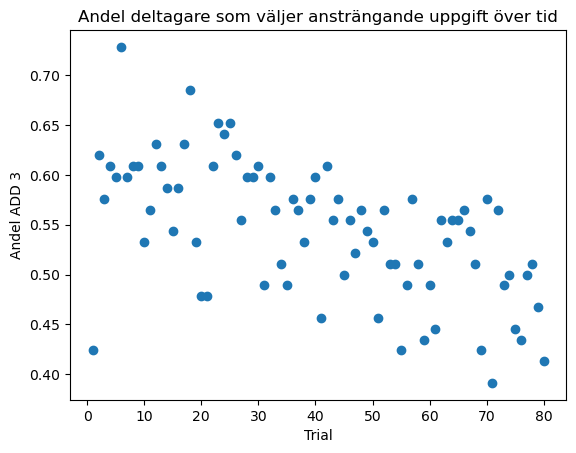

In [157]:
mean_per_trial = df_merged.groupby("trial")["task"].mean()

plt.scatter(mean_per_trial.index, mean_per_trial.values)
plt.xlabel("Trial")
plt.ylabel("Andel ADD 3")
plt.title("Andel deltagare som väljer ansträngande uppgift över tid")
plt.show()


**FÖRKLARING**
df.groupby("trial") → grupperar datan efter vilket trialnummer (1–80) det är.

Så den skapar 80 grupper:

Grupp 1 = alla rader där trial == 1

Grupp 2 = alla rader där trial == 2

osv. upp till trial == 80


["task"].mean() → inom varje grupp tar den medelvärdet av kolumnen task.

Eftersom vi har gjort task =

1 för "ADD 3"

0 för "DO NOTHING"

...så är medelvärdet av task inom varje grupp detsamma som: Andel deltagare som valde ADD 3 i det trialet.


x-axeln (index) = trialnummer (1 → 80)

y-axeln (värden) = andel (0–1) deltagare som valde ADD 3 i det trialet

In [158]:
mean_per_trial = df_merged.groupby("trial")["task"].mean().reset_index()

fig = px.scatter(mean_per_trial, x="trial", y="task",
                 title="Andel deltagare som väljer ansträngande uppgift över tid",
                 labels={"trial": "Trial", "task": "Andel ADD 3"},
                 trendline="ols")  #lägger till en regressionslinje
fig.show()
